In [18]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [19]:
# read the CSV file
df = pd.read_csv(r'C:\Users\Saemi\OneDrive\Education\WGU\D212 Data Mining II\PA\Dataset - Medical\medical_clean.csv')
# check the data information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 50 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   CaseOrder           10000 non-null  int64  
 1   Customer_id         10000 non-null  object 
 2   Interaction         10000 non-null  object 
 3   UID                 10000 non-null  object 
 4   City                10000 non-null  object 
 5   State               10000 non-null  object 
 6   County              10000 non-null  object 
 7   Zip                 10000 non-null  int64  
 8   Lat                 10000 non-null  float64
 9   Lng                 10000 non-null  float64
 10  Population          10000 non-null  int64  
 11  Area                10000 non-null  object 
 12  TimeZone            10000 non-null  object 
 13  Job                 10000 non-null  object 
 14  Children            10000 non-null  int64  
 15  Age                 10000 non-null  int64  
 16  Incom

In [20]:
df.columns

Index(['CaseOrder', 'Customer_id', 'Interaction', 'UID', 'City', 'State',
       'County', 'Zip', 'Lat', 'Lng', 'Population', 'Area', 'TimeZone', 'Job',
       'Children', 'Age', 'Income', 'Marital', 'Gender', 'ReAdmis',
       'VitD_levels', 'Doc_visits', 'Full_meals_eaten', 'vitD_supp',
       'Soft_drink', 'Initial_admin', 'HighBlood', 'Stroke',
       'Complication_risk', 'Overweight', 'Arthritis', 'Diabetes',
       'Hyperlipidemia', 'BackPain', 'Anxiety', 'Allergic_rhinitis',
       'Reflux_esophagitis', 'Asthma', 'Services', 'Initial_days',
       'TotalCharge', 'Additional_charges', 'Item1', 'Item2', 'Item3', 'Item4',
       'Item5', 'Item6', 'Item7', 'Item8'],
      dtype='object')

In [21]:
df.shape

(10000, 50)

In [22]:
#Select numerical variables by removing the object columns
df1 = df.select_dtypes(exclude = 'object')
df1.columns

Index(['CaseOrder', 'Zip', 'Lat', 'Lng', 'Population', 'Children', 'Age',
       'Income', 'VitD_levels', 'Doc_visits', 'Full_meals_eaten', 'vitD_supp',
       'Initial_days', 'TotalCharge', 'Additional_charges', 'Item1', 'Item2',
       'Item3', 'Item4', 'Item5', 'Item6', 'Item7', 'Item8'],
      dtype='object')

In [23]:
cont_df = df1.drop(['CaseOrder', 'Zip', 'Lat', 'Lng', 'Item1', 'Item2', 'Item3', 'Item4', 'Item5', 'Item6', 'Item7', 
                    'Item8'], axis=1)
cont_df.columns

Index(['Population', 'Children', 'Age', 'Income', 'VitD_levels', 'Doc_visits',
       'Full_meals_eaten', 'vitD_supp', 'Initial_days', 'TotalCharge',
       'Additional_charges'],
      dtype='object')

In [24]:
cont_df.shape

(10000, 11)

In [25]:
#Normalize the data using StandardScaler()
scaler = StandardScaler()
norm_df = scaler.fit_transform(cont_df)

In [26]:
scaled_df = pd.DataFrame(norm_df, columns = cont_df.columns)
scaled_df.to_csv('scaled_df.csv', index = False)
scaled_df.head()

,Population,Children,Age,Income,VitD_levels,Doc_visits,Full_meals_eaten,vitD_supp,Initial_days,TotalCharge,Additional_charges
0,-0.473168,-0.507129,-0.024795,1.615914,0.583603,0.944647,-0.993387,-0.634713,-0.907310,-0.727185,0.765005
1,0.090242,0.417277,-0.121706,0.221443,0.483901,-0.967981,0.990609,0.956445,-0.734595,-0.513228,0.715114
2,0.482983,0.417277,-0.024795,-0.915870,0.046227,-0.967981,-0.001389,-0.634713,-1.128292,-1.319983,0.698635
3,-0.526393,-0.969332,1.186592,-0.026263,-0.687811,-0.967981,-0.001389,-0.634713,-1.244503,-1.460517,0.009004
4,-0.315586,-0.507129,-1.526914,-1.377325,-0.260366,-0.011667,-0.993387,2.547602,-1.261991,-1.467285,-1.408991


In [27]:
#Perform PCA on transformed data & create loading matrix
pca = PCA()
PC = pca.fit_transform(scaled_df)

In [28]:
loading_matrix = pd.DataFrame(pca.components_, columns = cont_df.columns, index=('PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 
                                                                                 'PC7', 'PC8', 'PC9', 'PC10', 'PC11'))
loading_matrix

,Population,Children,Age,Income,VitD_levels,Doc_visits,Full_meals_eaten,vitD_supp,Initial_days,TotalCharge,Additional_charges
PC1,0.024451,0.034520,0.084872,-0.020184,-0.002039,-0.006889,-0.020703,0.025366,0.700222,0.701358,0.085223
PC2,-0.028354,0.017410,0.700762,-0.019046,0.020437,0.015447,0.032146,0.014522,-0.090235,-0.079643,0.700769
PC3,0.421855,-0.096731,0.023524,0.325252,-0.359913,0.213144,-0.603613,0.407015,-0.018411,-0.019610,0.025242
PC4,0.370209,0.349000,-0.017159,0.196995,0.572300,0.593922,0.129858,-0.069521,-0.005489,-0.002230,-0.006438
PC5,-0.235896,0.518807,0.006689,0.658378,-0.328573,-0.106642,0.030406,-0.348283,0.006565,0.004801,0.007919
PC6,0.349305,0.626415,-0.003294,-0.322788,0.133583,-0.545545,-0.228783,0.106250,-0.034373,-0.033307,0.001302
PC7,-0.479600,0.279715,-0.024529,0.081858,0.092902,0.072843,0.172002,0.799985,-0.005664,-0.005328,-0.029719
PC8,0.222540,-0.352459,0.008834,0.554281,0.414384,-0.535509,0.184049,0.161924,0.009234,0.009057,0.014130
PC9,0.475576,0.057534,-0.014554,-0.055190,-0.486165,0.021685,0.707448,0.172815,-0.004640,-0.002110,0.007697
PC10,0.014389,0.003628,0.706573,0.002259,-0.002326,0.001013,0.010803,0.000433,0.031468,-0.031443,-0.705993


In [29]:
#11 Eivenvalues from Kaiser Criterion
var = pca.explained_variance_
var

array([1.99519311, 1.71541814, 1.05092806, 1.01946663, 1.00651666,
       0.99712274, 0.98732133, 0.97060474, 0.96333931, 0.28347439,
       0.01171501])

In [32]:
# create a numpy array so that index starts with 1 instead of 0
pcomp = np.arange(pca.n_components_) + 1

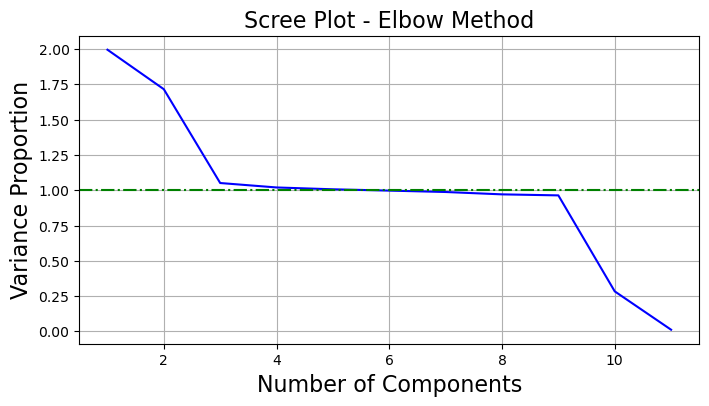

In [38]:
plt.figure(figsize = (8,4))
plt.plot(pcomp, var, "b-")
plt.title("Scree Plot - Elbow Method", fontsize = 16)
plt.xlabel("Number of Components", fontsize = 16)
plt.ylabel("Variance Proportion", fontsize = 16)
plt.axhline(y = 1, color='g', linestyle = 'dashdot')
plt.grid()
plt.show()

In [39]:
#Significant components identified by the Kaiser Criterion rule
print(dict(zip(['PC1', 'PC2', 'PC3', 'PC4', 'PC5'], pcomp)))

{'PC1': 1, 'PC2': 2, 'PC3': 3, 'PC4': 4, 'PC5': 5}


In [40]:
#Variance/eigenvalue of each pc identified by the Kaiser Criterion rule
print("Variance of the first 5 principal components:")
print(pca.explained_variance_[:5])

Variance of the first 5 principal components:
[1.99519311 1.71541814 1.05092806 1.01946663 1.00651666]


In [41]:
#Explained Variance Ratio of the first 5 principal components
var_ratio = pca.explained_variance_ratio_[:5] * 100
var_ratio

array([18.1363054 , 15.59315087,  9.55293603,  9.26695167,  9.14923641])

In [42]:
#Sum of the those 5 ratios
total_variance_captured = sum(var_ratio)
total_variance_captured

61.69858037665163

In [23]:
# I started with 11 continous variables and 11 PCs for PCA (Principal Component Analysis).
# After using the Kaiser Criterion method, I decided to have 5 principal components which represent approximately 62% of the original dataset.
# 5 principal components were selected from the Kaiser Criterion method because it is considered to be important if it is greater than 1 which is the standard deviation after normalizing the data